# Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv(r'F:\Python class\New folder\bank-additional\bank-additional-full.csv',sep=';')

In [96]:
df.head(7)

age        job  marital            education  default housing loan  \
0   56  housemaid  married             basic.4y       no      no   no   
1   57   services  married          high.school  unknown      no   no   
2   37   services  married          high.school       no     yes   no   
3   40     admin.  married             basic.6y       no      no   no   
4   56   services  married          high.school       no      no  yes   
5   45   services  married             basic.9y  unknown      no   no   
6   59     admin.  married  professional.course       no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  

[7 rows x 21 columns]

In [98]:
import pandas_profiling as pf

In [99]:
data=pf.ProfileReport(df)

In [6]:
data

In [101]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

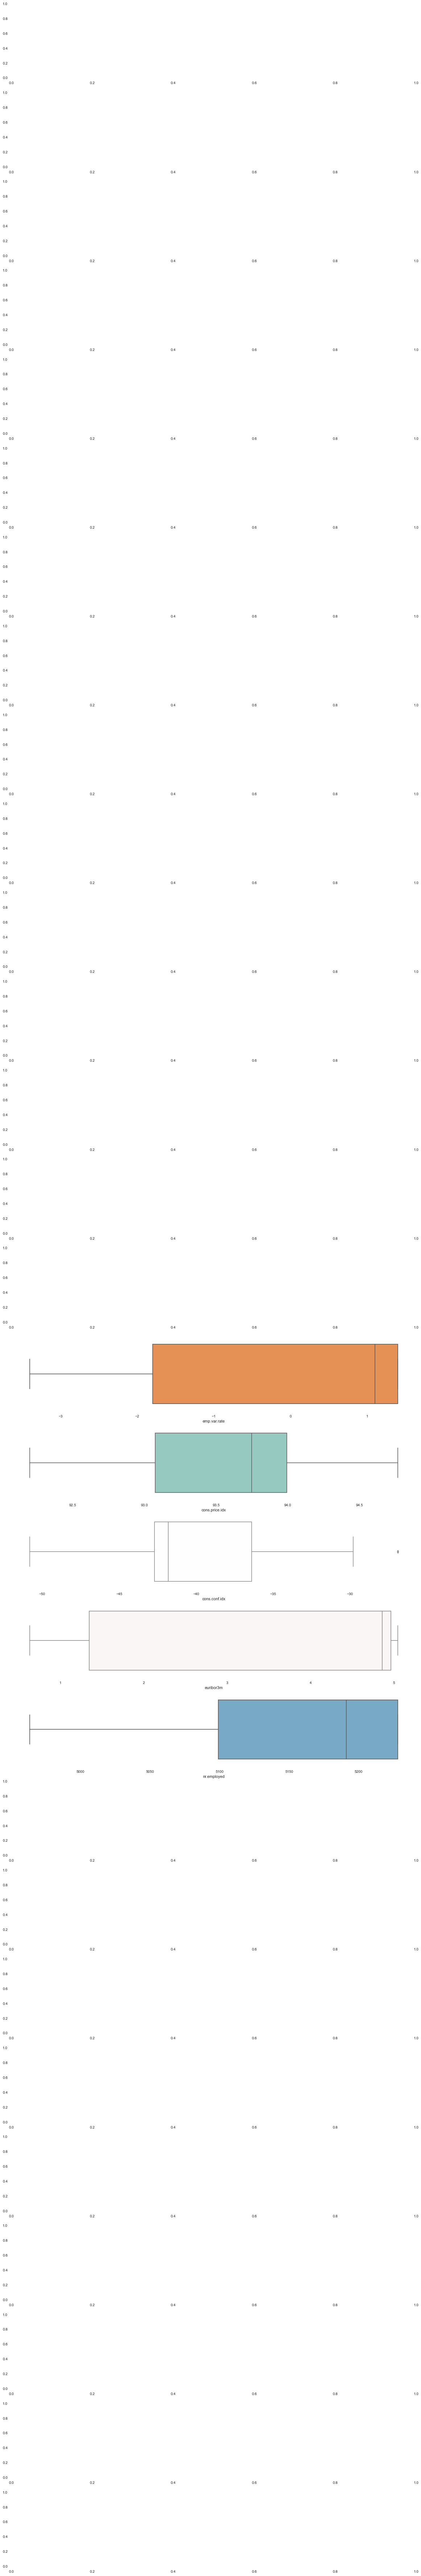

In [103]:
fig, axs = plt.subplots(29,figsize=(20,130))

#plt1 = sns.boxplot(df['age'], ax = axs[0])
#plt2 = sns.boxplot(df['job'],ax=axs[1])
#plt3 = sns.boxplot(df['marital'],ax=axs[2])
#plt4 = sns.boxplot(df['education'],ax=axs[3])
#plt5 = sns.boxplot(df['default'],ax=axs[4])
#plt6 = sns.boxplot(df['housing'],ax=axs[5])
#plt7 = sns.boxplot(df['loan'],ax=axs[6])
#plt8 = sns.boxplot(df['contact'],ax=axs[7])
#plt9 = sns.boxplot(df['month'],ax=axs[8])
#plt10 = sns.boxplot(df['day_of_week'],ax=axs[9])
#plt11 = sns.boxplot(df['duration'], ax = axs[10])
#plt12 = sns.boxplot(df['campaign'],ax=axs[11])
#plt13 = sns.boxplot(df['pdays'],ax=axs[12])
#plt14 = sns.boxplot(df['previous'],ax=axs[13])
#plt15 = sns.boxplot(df['poutcome'],ax=axs[14])
plt16 = sns.boxplot(df['emp.var.rate'],ax=axs[15],palette='Oranges')
plt17 = sns.boxplot(df['cons.price.idx'],ax=axs[16],palette='Set3')
plt18 = sns.boxplot(df['cons.conf.idx'],ax=axs[17],palette='RdGy')
plt19 = sns.boxplot(df['euribor3m'],ax=axs[18],palette='vlag')
plt20 = sns.boxplot(df['nr.employed'],ax=axs[19],palette='Blues')
#plt21 = sns.boxplot(df['y'], ax = axs[20])


In [104]:
df.shape

(41188, 21)

In [105]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [106]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [107]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [108]:
df[["contact","y"]]

contact    y
0      telephone   no
1      telephone   no
2      telephone   no
3      telephone   no
4      telephone   no
...          ...  ...
41183   cellular  yes
41184   cellular   no
41185   cellular   no
41186   cellular  yes
41187   cellular   no

[41188 rows x 2 columns]

In [109]:
colname_cat=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname_cat.append(x)
colname_cat


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

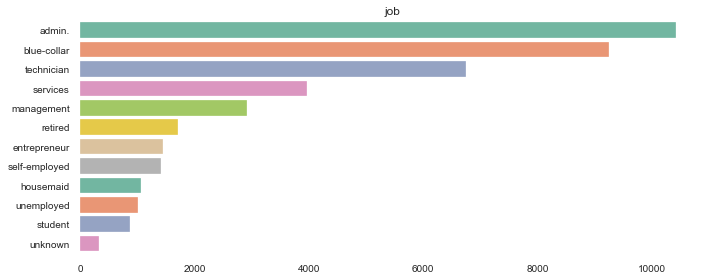

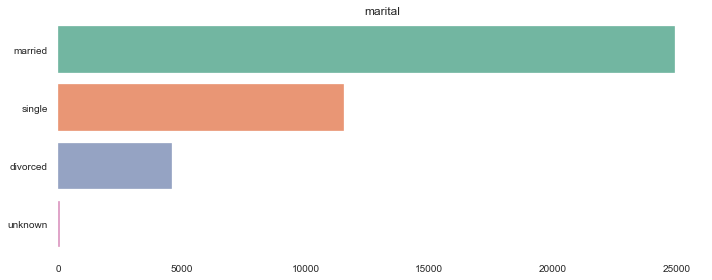

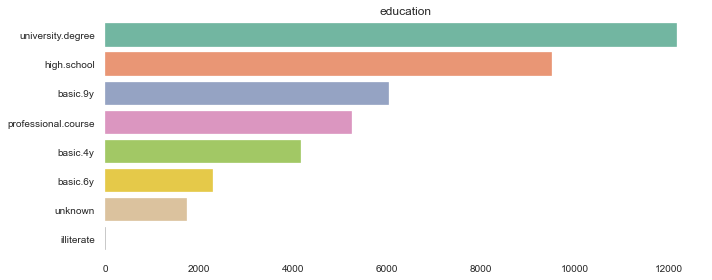

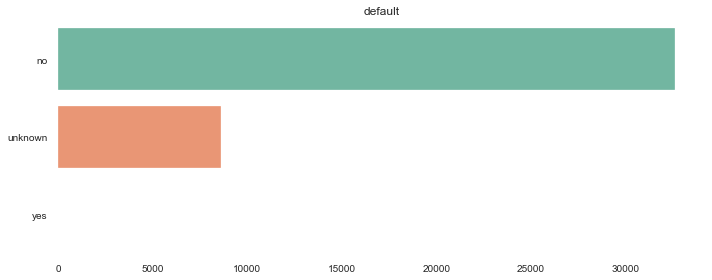

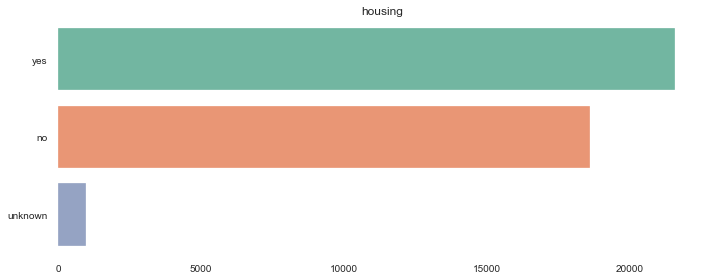

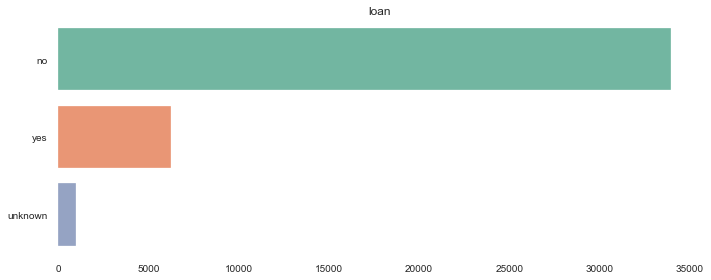

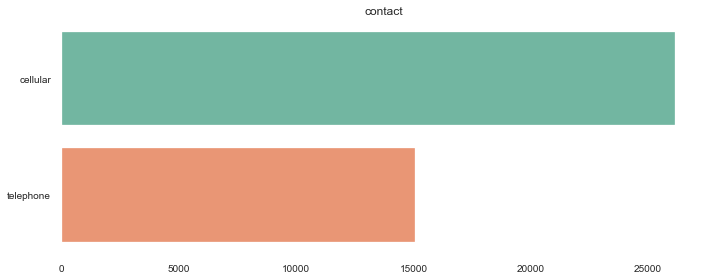

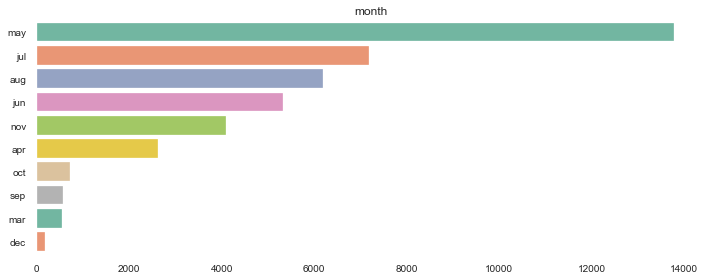

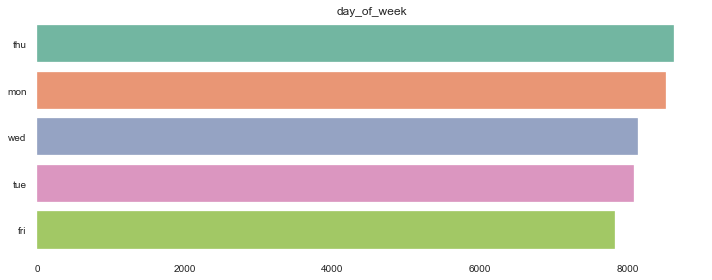

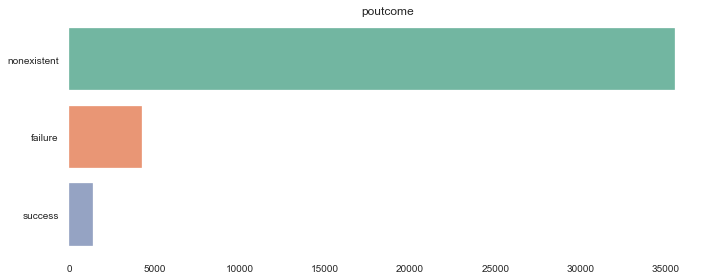

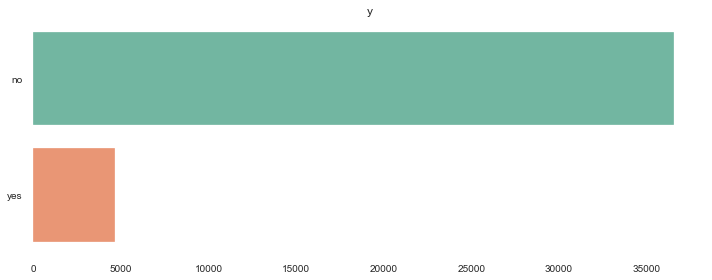

In [110]:
for col in colname_cat:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, palette='Set2')
    plt.title(col)
    plt.tight_layout()

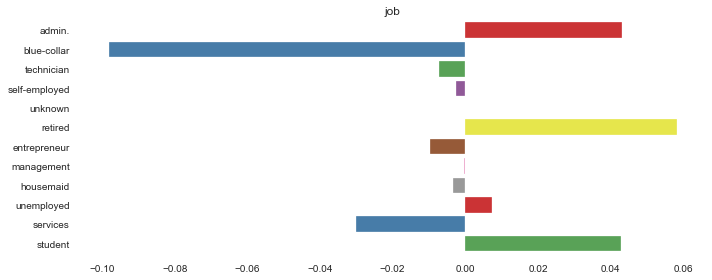

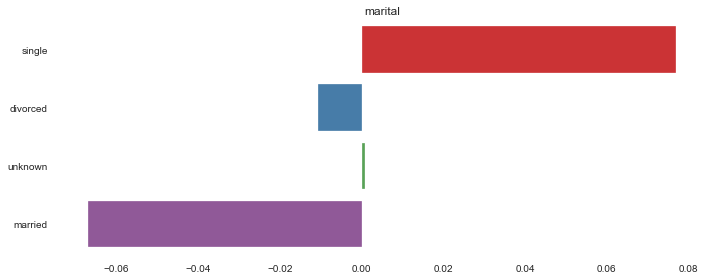

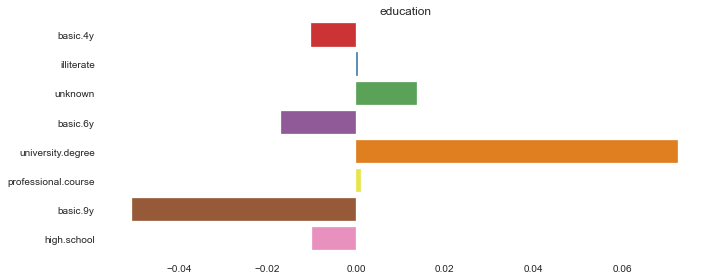

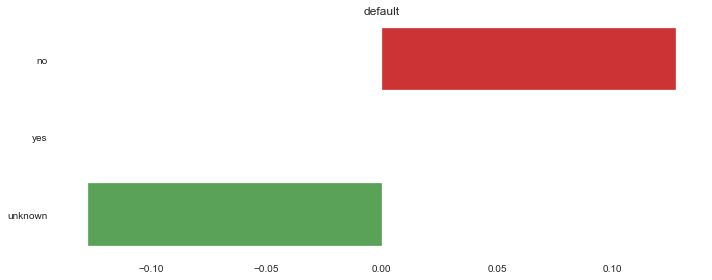

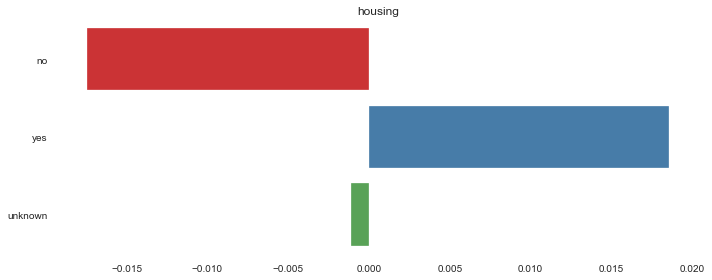

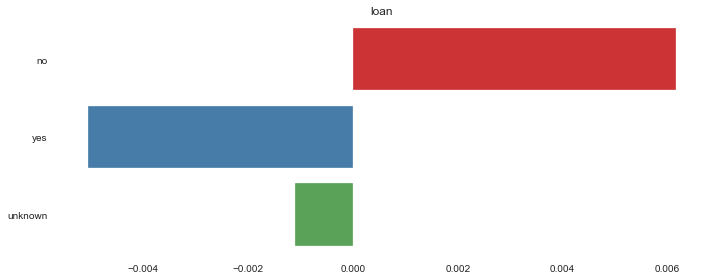

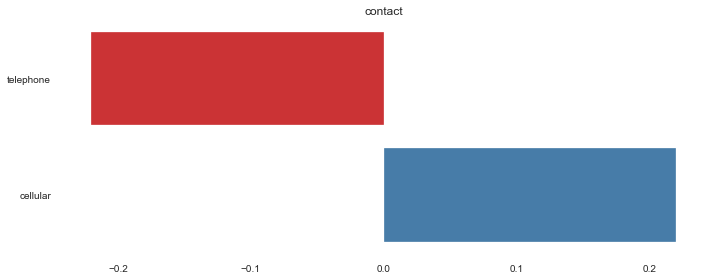

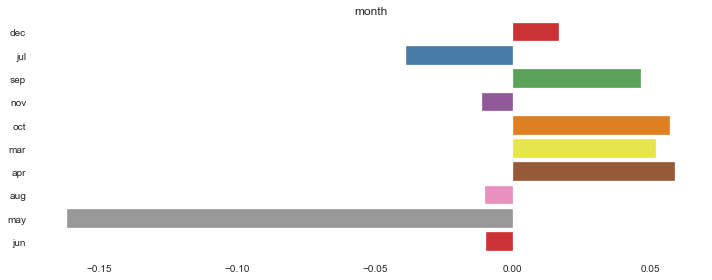

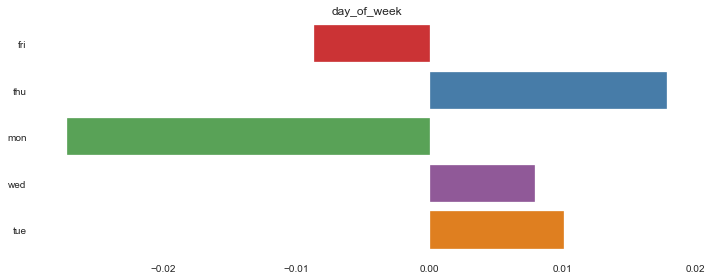

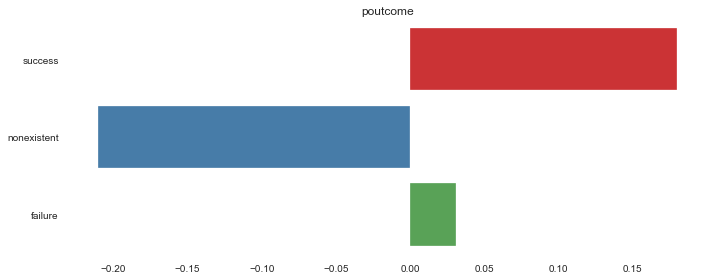

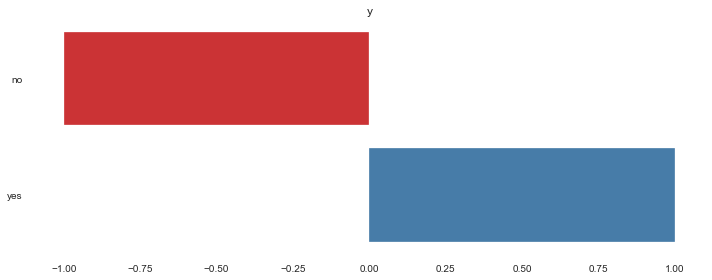

In [111]:
for col in colname_cat:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index, palette='Set1')
    plt.title(col)
    plt.tight_layout()

In [112]:
df.default.replace('unknown','no',inplace=True)

In [113]:
df['default'] = df.default.replace('unknown',df.default.mode([0]))

In [114]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [115]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [116]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [117]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [118]:
df['y'].replace({'no':0,'yes':1},inplace=True)

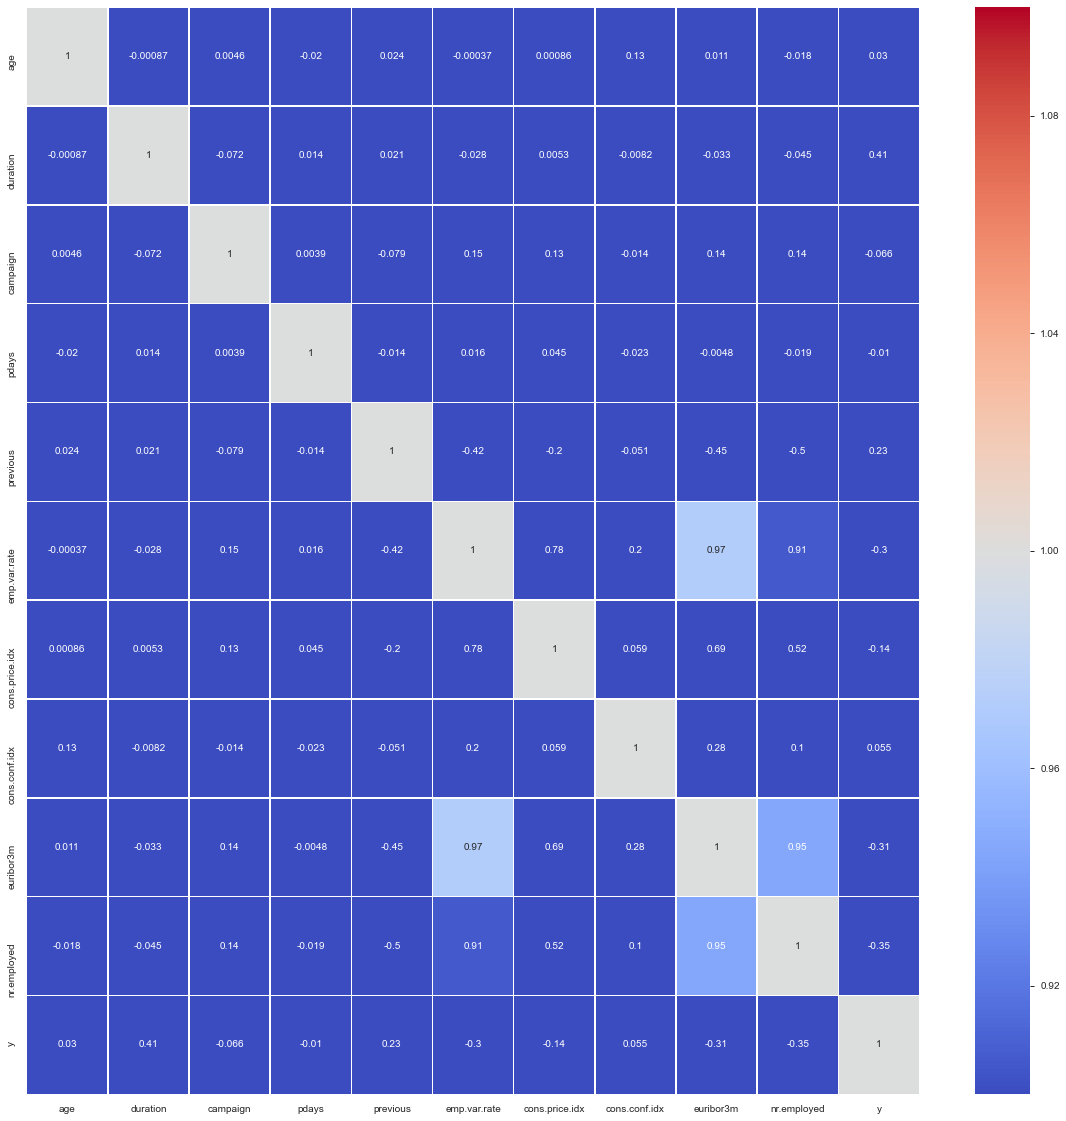

In [119]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',linewidths=0.5,ax=ax,vmin= 1, vmax=1)

In [120]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

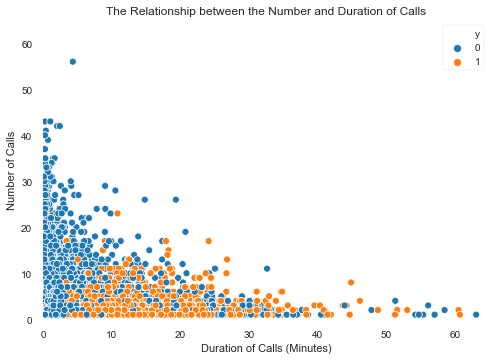

In [121]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [122]:
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [123]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname_cat:
    df[x]=le.fit_transform(df[x])
    """
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    """


In [124]:
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     0        1      6   

   day_of_week  ...  campaign     pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1  6.014521         0         1           1.1   
1            1  ...         1  6.014521         0         1           1.1   
2            1  ...         1  6.014521         0         1           1.1   
3            1  ...         1  6.014521         0         1           1.1   
4            1  ...         1  6.014521         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [125]:
df.shape

(40898, 21)

age                  AxesSubplot(0.125,0.749828;0.0824468x0.130172)
job               AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
marital           AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
education         AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
default           AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
housing           AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
loan              AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
contact           AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
month                AxesSubplot(0.125,0.593621;0.0824468x0.130172)
day_of_week       AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
duration          AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
campaign          AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
pdays             AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
previous          AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
poutcome          AxesSubplot(0.718617,0.593621;

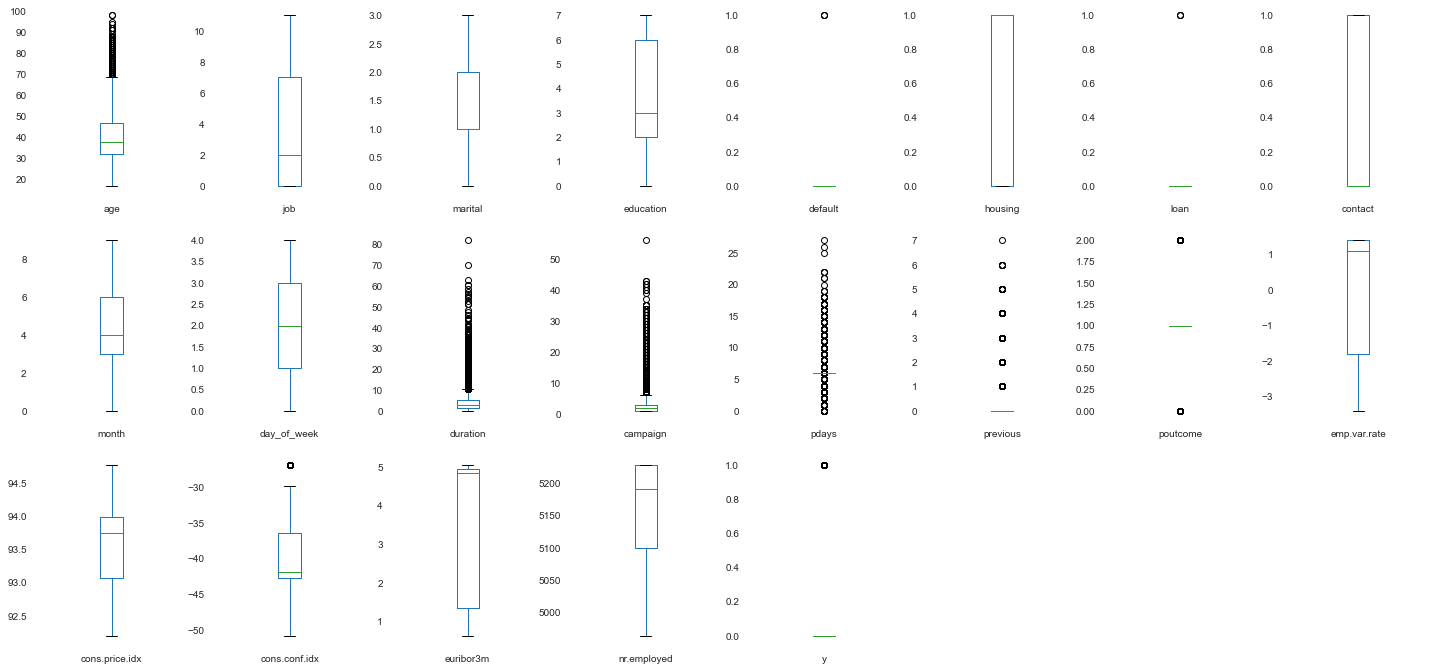

In [126]:
df.loc[:,:].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,8),figsize=(25,20))

In [127]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [128]:
X

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 5.6000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 7.4000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [129]:
Y

array([0., 0., 0., ..., 0., 1., 0.])

In [130]:


from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X) #scaling function ------ X variable will map with scaler function /formula

X= scaler.transform(X)
print(X)

[[ 1.53158095 -0.19507093 -0.28253398 ...  0.88290624  0.70964662
   0.32841328]
 [ 1.62751705  0.92421789 -0.28253398 ...  0.88290624  0.70964662
   0.32841328]
 [-0.29120493  0.92421789 -0.28253398 ...  0.88290624  0.70964662
   0.32841328]
 ...
 [ 1.53158095  0.36457348 -0.28253398 ... -2.22707809 -1.5012945
  -2.83091982]
 [ 0.38034776  1.4838623  -0.28253398 ... -2.22707809 -1.5012945
  -2.83091982]
 [ 3.25843073  0.36457348 -0.28253398 ... -2.22707809 -1.5012945
  -2.83091982]]


In [131]:
Y=Y.astype(int)

In [132]:
from sklearn.model_selection import train_test_split # this split data into train and test data.

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  
# this is same in all regression method, no need to change.

In [133]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting trainig in model
classifier.fit(X_train,Y_train) # fit data using 

Y_pred=classifier.predict(X_test) #predict using model.
#print(list(zip(Y_pred,Y_test)))
print(list(zip(df.columns[:-1],classifier.coef_.ravel())))

print(classifier.coef_)
print(classifier.coef_)

[('age', 0.06004837737920807), ('job', 0.06395221118234268), ('marital', 0.09168462858516671), ('education', 0.12672354396720367), ('default', -0.03501050766350187), ('housing', -0.02248557056242271), ('loan', -0.03501050766350187), ('contact', -0.3498779650461385), ('month', -0.24409450737648064), ('day_of_week', 0.08697076199715023), ('duration', 1.149332133510028), ('campaign', -0.05604228862898746), ('pdays', -0.006425827436802412), ('previous', 0.11806221113366464), ('poutcome', 0.3167274534347532), ('emp.var.rate', -1.5248297922345213), ('cons.price.idx', 0.4310016697779708), ('cons.conf.idx', 0.09412541182243198), ('euribor3m', 1.1154125637546741), ('nr.employed', -0.9168982552960413)]
[[ 0.06004838  0.06395221  0.09168463  0.12672354 -0.03501051 -0.02248557
  -0.03501051 -0.34987797 -0.24409451  0.08697076  1.14933213 -0.05604229
  -0.00642583  0.11806221  0.31672745 -1.52482979  0.43100167  0.09412541
   1.11541256 -0.91689826]]
[[ 0.06004838  0.06395221  0.09168463  0.1267235

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classification_report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)


[[10601   287]
 [  802   580]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10888
           1       0.67      0.42      0.52      1382

    accuracy                           0.91     12270
   macro avg       0.80      0.70      0.73     12270
weighted avg       0.90      0.91      0.90     12270

accuracy of the model: 0.9112469437652811


## Adjusting Threashold

In [135]:
#store the predicted probabilities.
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)
#This below concept is about sigmoid function.
#use recall 1 as 0.44 from above output 

[[0.98079111 0.01920889]
 [0.7239001  0.2760999 ]
 [0.97965688 0.02034312]
 ...
 [0.97385053 0.02614947]
 [0.99059759 0.00940241]
 [0.34924733 0.65075267]]


In [136]:
y_pred_class=[]
for value in y_pred_prob[:,1]:#all rows and last column which comes under 0 variable shown above
    if value > 0.46: #instead of 0.5 we have take 0.45 ,need to predict which will be better threshold for better outptut. 
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
print("classification_report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("accuracy of the model:",acc)

#this is used to observer recall for 0 and 1 .

[[10546   342]
 [  755   627]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10888
           1       0.65      0.45      0.53      1382

    accuracy                           0.91     12270
   macro avg       0.79      0.71      0.74     12270
weighted avg       0.90      0.91      0.90     12270

accuracy of the model: 0.9105949470252649


In [138]:
for a in np.arange(0.4,0.61,0.01):#thresholds
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)#this will run above values and check probability.
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
    
    
#this is easy way to test threshold instead of sklearn.metrices
#find total error and type 2 error should be less which is relevant to answer.......as 0.46(1721) is better option even its error is more than 0.47(1718)

Errors at threshold  0.4 : 1131  , type 2 error : 683  , type 1 error: 448
Errors at threshold  0.41000000000000003 : 1132  , type 2 error : 699  , type 1 error: 433
Errors at threshold  0.42000000000000004 : 1118  , type 2 error : 708  , type 1 error: 410
Errors at threshold  0.43000000000000005 : 1116  , type 2 error : 723  , type 1 error: 393
Errors at threshold  0.44000000000000006 : 1107  , type 2 error : 734  , type 1 error: 373
Errors at threshold  0.45000000000000007 : 1103  , type 2 error : 742  , type 1 error: 361
Errors at threshold  0.4600000000000001 : 1097  , type 2 error : 755  , type 1 error: 342
Errors at threshold  0.4700000000000001 : 1097  , type 2 error : 770  , type 1 error: 327
Errors at threshold  0.4800000000000001 : 1096  , type 2 error : 785  , type 1 error: 311
Errors at threshold  0.4900000000000001 : 1092  , type 2 error : 794  , type 1 error: 298
Errors at threshold  0.5000000000000001 : 1089  , type 2 error : 802  , type 1 error: 287
Errors at threshold 

# AUC n ROC Curve

In [139]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc) #overall auc of the model.


0.9274290340485574


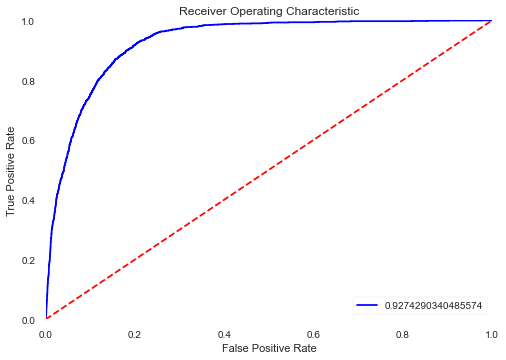

In [140]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc) #x-array is fpr and y-array is tpr and b is blue with label of auc
plt.legend(loc = 'lower right')#lower right is place to display roc curve value.
plt.plot([0, 1], [0, 1],'r--')#r is red color and -- is red line
plt.xlim([0, 1]) #xaxis limitation
plt.ylim([0, 1])#y axis limitation
plt.xlabel('False Positive Rate') #labelling axis.
plt.ylabel('True Positive Rate')  #labelling axis.

plt.show()


In [141]:
from sklearn import metrics
#This process is on the basis of 0.46 threshold.
fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7111397882505308
[0.         0.03141073 1.        ]
[0.        0.4536903 1.       ]


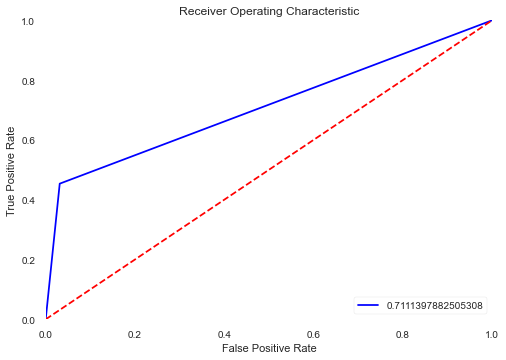

In [142]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [143]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold #earlier model selection was called as cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)#clasifier data is sent to train data
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.90499476 0.90778903 0.91128187 0.90289906 0.89521481 0.91302829
 0.90394691 0.915124   0.91649196 0.9067086 ]
0.9077479287655972


In [144]:
#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value]) 

    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classification_report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)

#this is used to observer recall for 0 and 1 .

[[10602   286]
 [  801   581]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10888
           1       0.67      0.42      0.52      1382

    accuracy                           0.91     12270
   macro avg       0.80      0.70      0.73     12270
weighted avg       0.90      0.91      0.90     12270

accuracy of the model: 0.9114099429502852


# RFE

In [146]:
colname=df.columns #storing all columns

In [147]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, 8) #using only 8 variable
model_rfe = rfe.fit(X_train, Y_train) #rfe works as train model 
print("Num Features: ",model_rfe.n_features_) # this shows features which shows which variable are taken to use
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_))) # this will show u true n false and show as which is kept and eliminated from grp
print("Feature Ranking: ", model_rfe.ranking_) #This show rank of elimination as which variable is elimated as rank 1,2,3,4,5,etc.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Num Features:  8
Selected Features: 
[('age', False), ('job', False), ('marital', False), ('education', False), ('default', False), ('housing', False), ('loan', False), ('contact', True), ('month', True), ('day_of_week', False), ('duration', True), ('campaign', False), ('pdays', False), ('previous', False), ('poutcome', True), ('emp.var.rate', True), ('cons.price.idx', True), ('cons.conf.idx', False), ('euribor3m', True), ('nr.employed', True)]
Feature Ranking:  [ 8  6  7  2 10 12 11  1  1  5  1  9 13  3  1  1  1  4  1  1]


In [148]:
Y_pred=model_rfe.predict(X_test)
#print(list(zip(Y_test,Y_pred)))


In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classification_report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)


[[10590   298]
 [  814   568]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10888
           1       0.66      0.41      0.51      1382

    accuracy                           0.91     12270
   macro avg       0.79      0.69      0.73     12270
weighted avg       0.90      0.91      0.90     12270

accuracy of the model: 0.9093724531377343


# SDG in Classifier

In [150]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss='log',random_state=10,alpha=0.0001)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(list(zip(df.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)


[('age', 0.32769730311059114), ('job', 0.1166597788260806), ('marital', 0.08378274312099536), ('education', 0.2432278421513683), ('default', -0.019409163034047085), ('housing', 0.05011687058292524), ('loan', -0.019409163034047085), ('contact', -0.3627371309773016), ('month', -0.29965829710962416), ('day_of_week', 0.06506295909430582), ('duration', 1.1363558343323183), ('campaign', -0.10590689931934735), ('pdays', 0.07778369407578486), ('previous', 0.09203730011752441), ('poutcome', 0.3045911378577804), ('emp.var.rate', -1.5495771245515821), ('cons.price.idx', 0.40235440131977507), ('cons.conf.idx', 0.015666443103997178), ('euribor3m', 0.9644248371749472), ('nr.employed', -0.920553157722172)]


In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("classification_report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)


[[10431   457]
 [  715   667]]
classification_report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10888
           1       0.59      0.48      0.53      1382

    accuracy                           0.90     12270
   macro avg       0.76      0.72      0.74     12270
weighted avg       0.90      0.90      0.90     12270

accuracy of the model: 0.904482477587612


Accuracy found in AUC and ROC are better result than other algorithm 0.9274290340485574